In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from bdshare import get_basic_hist_data
plt.style.use('fivethirtyeight')

In [2]:
df= yf.Ticker('FB').history(start='2020-01-01',end='2022-08-07')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-31,203.994995,205.559998,203.600098,205.250000,8962756,0,0
2020-01-02,206.750000,209.789993,206.270004,209.779999,12090707,0,0
2020-01-03,207.213501,210.399994,206.949997,208.669998,11197416,0,0
2020-01-06,206.699997,212.779999,206.520004,212.600006,17073861,0,0
2020-01-07,212.820007,214.580002,211.750000,213.059998,14604985,0,0
...,...,...,...,...,...,...,...
2022-07-11,167.065002,167.490005,161.910004,162.880005,21905133,0,0
2022-07-12,164.800003,165.910706,162.100006,163.270004,16639659,0,0
2022-07-13,160.160004,164.979996,159.612701,163.490005,16555138,0,0


In [3]:
#Calculate the simple moving average, standard deviation, upper and lower band
#get the time period (20 day)
period=20
#Calculate the Simple Moving Average(SMA)
df['SMA']=df['Close'].rolling(window=period).mean()
#Get the standard Deviation
df['STD']=df['Close'].rolling(window=period).std()
#Calculate the upper Bollinger band
df['Upper']=df['SMA']+(df['STD']*2)
#calculate the lower bollinger band
df['Lower']=df['SMA']-(df['STD']*2)
#Create a list of columns to keep
column_list = ['Close','SMA','Upper','Lower']
df[column_list]

,Close,SMA,Upper,Lower
Date,,,,
2019-12-31,205.250000,NaN,NaN,NaN
2020-01-02,209.779999,NaN,NaN,NaN
2020-01-03,208.669998,NaN,NaN,NaN
2020-01-06,212.600006,NaN,NaN,NaN
2020-01-07,213.059998,NaN,NaN,NaN
...,...,...,...,...
2022-07-11,162.880005,164.931502,175.851068,154.011935
2022-07-12,163.270004,164.316502,174.032400,154.600604
2022-07-13,163.490005,164.278002,174.000943,154.555062


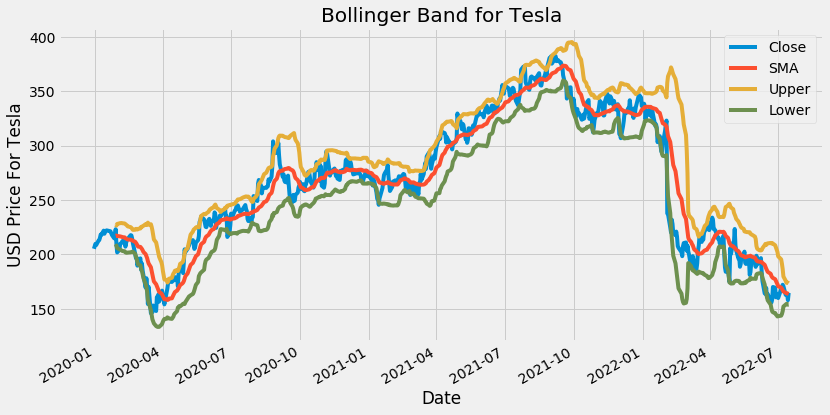

In [4]:
df[column_list].plot(figsize=(12.2,6.4))
plt.title('Bollinger Band for Tesla')
plt.ylabel('USD Price For Tesla')
plt.show()

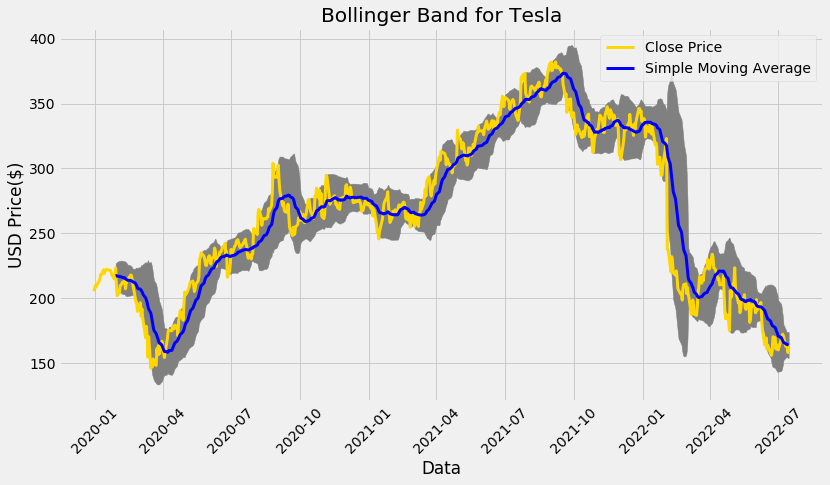

In [5]:
#plot and Shade the area between the two Bollinger bands 
#get the figure and the figure size
fig=plt.figure(figsize=(12.2,6.4))
ax=fig.add_subplot(1,1,1)#number of row,number of column ,number of index
x_axis=np.array(df.index)
#Plot and shade the area between the upper band and the lower band 
ax.fill_between(x_axis,df['Upper'],df['Lower'],color='gray')
#plot the closing price and moving Average 
ax.plot(x_axis,np.array(df['Close']),color='gold',lw=3,label='Close Price')#lw=line width
ax.plot(x_axis,np.array(df['SMA']),color='blue',lw=3,label='Simple Moving Average')#lw=line width
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Data')
ax.set_ylabel('USD Price($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [6]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,STD,Upper,Lower
Date,,,,,,,,,,,
2019-12-31,203.994995,205.559998,203.600098,205.250000,8962756,0,0,NaN,NaN,NaN,NaN
2020-01-02,206.750000,209.789993,206.270004,209.779999,12090707,0,0,NaN,NaN,NaN,NaN
2020-01-03,207.213501,210.399994,206.949997,208.669998,11197416,0,0,NaN,NaN,NaN,NaN
2020-01-06,206.699997,212.779999,206.520004,212.600006,17073861,0,0,NaN,NaN,NaN,NaN
2020-01-07,212.820007,214.580002,211.750000,213.059998,14604985,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,167.065002,167.490005,161.910004,162.880005,21905133,0,0,164.931502,5.459783,175.851068,154.011935
2022-07-12,164.800003,165.910706,162.100006,163.270004,16639659,0,0,164.316502,4.857949,174.032400,154.600604
2022-07-13,160.160004,164.979996,159.612701,163.490005,16555138,0,0,164.278002,4.861470,174.000943,154.555062


In [7]:
def get_signal(data):
    
    buy_signal = []
    sell_signal = []
    last_buy_price=0
    last_sell_price=0
    back_to_back_buy=0
    back_to_back_sell=0
    stock_in_hold=0
    for i in range(len(data['Close'])):
        #Sell
        if data['Close'][i]>data['Upper'][i] and data['Close'][i] > last_sell_price*1.05 and back_to_back_sell>0 and 0<stock_in_hold<10: #then you should Sell
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
            stock_in_hold=stock_in_hold-0.20
            last_sell_price=data["Close"][i]
            back_to_back_sell=back_to_back_sell+1
            back_to_back_buy=0
            
        elif back_to_back_buy>0 and data['Close'][i] > last_buy_price*1.05 and 0<stock_in_hold<10:#then you should Sell
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
            stock_in_hold=stock_in_hold-0.20
            last_sell_price=data["Close"][i]
            back_to_back_sell=back_to_back_sell+1
            back_to_back_buy=0
            
        elif 0<back_to_back_sell<4 and data['Close'][i] > last_sell_price*1.05 and 0<stock_in_hold<10: #then you should Sell
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
            stock_in_hold=stock_in_hold-0.20
            last_sell_price=data["Close"][i]
            back_to_back_sell=back_to_back_sell+1
            back_to_back_buy=0
            

            
        #buy
        elif data['Close'][i]<data['Lower'][i] and stock_in_hold<10 and back_to_back_buy==0:#Then you should buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            stock_in_hold=stock_in_hold+0.20
            last_buy_price=data["Close"][i]
            back_to_back_buy=back_to_back_buy+1
            back_to_back_sell=0
            
        elif data['Close'][i]<data['Lower'][i] and stock_in_hold<10 and data['Close'][i]<last_buy_price*0.95 and 0>back_to_back_buy>3:#Then you should buy
            print(data['Close'][i])
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            stock_in_hold=stock_in_hold+0.20
            last_buy_price=data["Close"][i]
            back_to_back_buy=back_to_back_buy+1
            back_to_back_sell=0#
            
        
        elif back_to_back_buy>0 and data['Close'][i]<last_buy_price*0.95-0.3*(back_to_back_buy*back_to_back_buy) and 0<stock_in_hold<10:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            stock_in_hold=stock_in_hold+0.20
            last_buy_price=data["Close"][i]
            back_to_back_buy=back_to_back_buy+1
            back_to_back_sell=0
            
            
        elif back_to_back_sell>0 and data['Close'][i]<last_sell_price*0.95 and 0<stock_in_hold<10 and last_sell_price>0:#then you should Sell
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            stock_in_hold=stock_in_hold+0.20
            last_buy_price=data["Close"][i]
            back_to_back_buy=back_to_back_buy+1            
            back_to_back_sell=0
            
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            
    return(buy_signal,sell_signal)

df['Buy']=get_signal(df)[0]
df['Sell']=get_signal(df)[1]


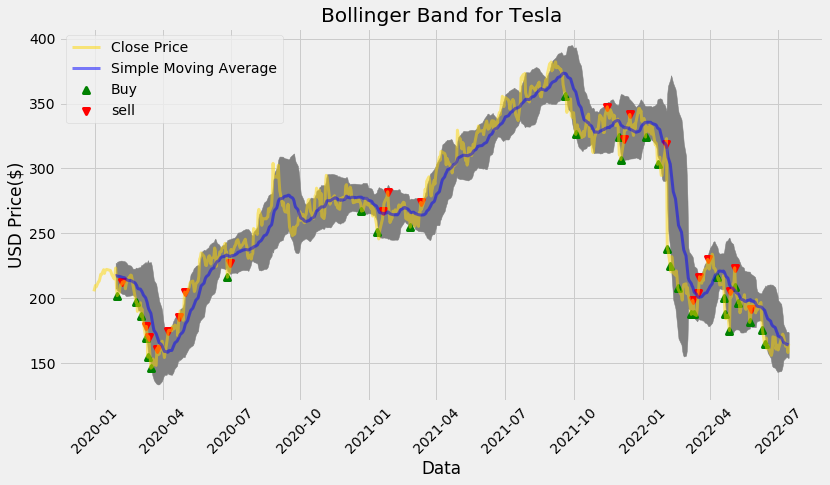

In [8]:
df1=df#[:252]
#plot and Shade the area between the two Bollinger bands 
#get the figure and the figure size
fig=plt.figure(figsize=(12.2,6.4))
ax=fig.add_subplot(1,1,1)#number of row,number of column ,number of index
x_axis=np.array(df1.index)
#Plot and shade the area between the upper band and the lower band 
ax.fill_between(x_axis,df1['Upper'],df1['Lower'],color='gray')
#plot the closing price and moving Average 
ax.plot(x_axis,np.array(df1['Close']),color='gold',lw=3,label='Close Price',alpha=0.5)#lw=line width
ax.plot(x_axis,np.array(df1['SMA']),color='blue',lw=3,label='Simple Moving Average',alpha=0.5)#lw=line width
ax.scatter(x_axis,np.array(df1['Buy']),color='Green',lw=3,label='Buy',marker='^',alpha=1)
ax.scatter(x_axis,np.array(df1['Sell']),color='red',lw=3,label='sell',marker='v',alpha=1)
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Data')
ax.set_ylabel('USD Price($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()

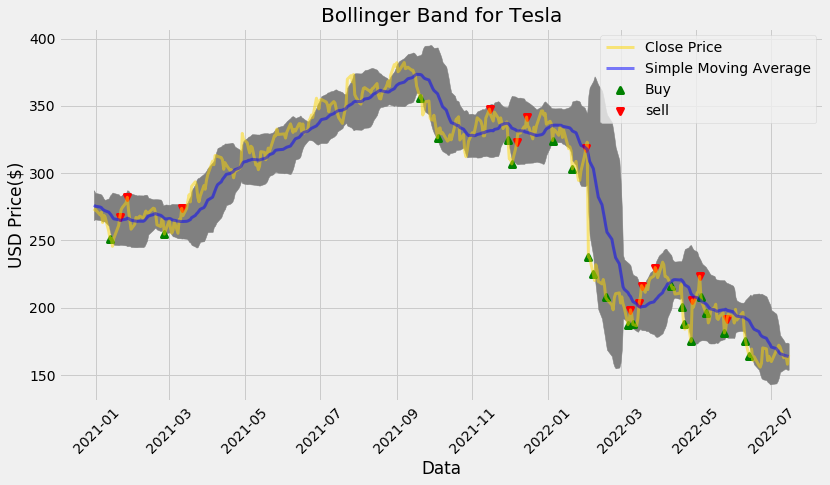

In [9]:
df1=df[252:]
#plot and Shade the area between the two Bollinger bands 
#get the figure and the figure size
fig=plt.figure(figsize=(12.2,6.4))
ax=fig.add_subplot(1,1,1)#number of row,number of column ,number of index
x_axis=np.array(df1.index)
#Plot and shade the area between the upper band and the lower band 
ax.fill_between(x_axis,df1['Upper'],df1['Lower'],color='gray')
#plot the closing price and moving Average 
ax.plot(x_axis,np.array(df1['Close']),color='gold',lw=3,label='Close Price',alpha=0.5)#lw=line width
ax.plot(x_axis,np.array(df1['SMA']),color='blue',lw=3,label='Simple Moving Average',alpha=0.5)#lw=line width
ax.scatter(x_axis,np.array(df1['Buy']),color='Green',lw=3,label='Buy',marker='^',alpha=1)
ax.scatter(x_axis,np.array(df1['Sell']),color='red',lw=3,label='sell',marker='v',alpha=1)
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Data')
ax.set_ylabel('USD Price($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()